In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
from datetime import date
today = date.today()

In [3]:
btc = pd.read_html('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20171215&end=20190101')
btc = btc[0]
dates = btc['Date']
dates = pd.to_datetime(dates)
btc.drop(labels='Date',axis=1,inplace=True)
btc['Date'] = dates
btc = btc.sort_values(by='Date',axis=0,ascending=True)

In [4]:
log_returns = np.log(1 + btc['Close**'].pct_change())

In [5]:
log_returns.tail()

4    0.071042
3   -0.026733
2    0.011850
1   -0.032400
0    0.026581
Name: Close**, dtype: float64

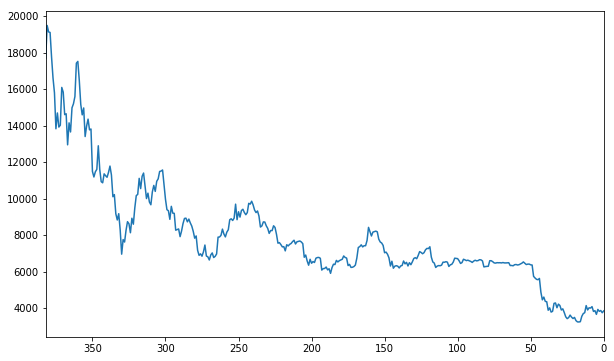

In [6]:
btc['Close**'].plot(figsize=(10,6));

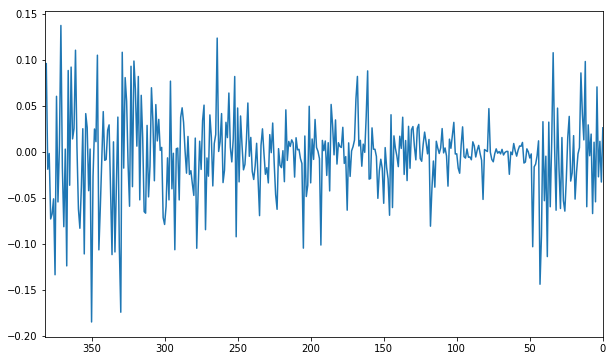

In [7]:
log_returns.plot(figsize=(10,6))

In [8]:
u = log_returns.mean()
u

-0.003998863300366749

In [9]:
var = log_returns.var()
var

0.0020068125405966223

In [10]:
drift = u - (.5 * var)
drift

-0.0050022695706650605

In [11]:
stddev = log_returns.std()
stddev

0.04479746131865758

In [12]:
norm.ppf(.95)

1.6448536269514722

In [13]:
x = np.random.rand(10,2)
x

array([[0.54745808, 0.49469431],
       [0.58137592, 0.63459411],
       [0.6366972 , 0.96883057],
       [0.94992355, 0.99961477],
       [0.25197868, 0.66381212],
       [0.33049823, 0.34509044],
       [0.72947269, 0.55033207],
       [0.41226574, 0.38519437],
       [0.83123898, 0.6837903 ],
       [0.8974746 , 0.86878294]])

In [14]:
norm.ppf(x)

array([[ 0.11924174, -0.0132998 ],
       [ 0.20541468,  0.34404588],
       [ 0.34964437,  1.86387783],
       [ 1.64411281,  3.36319779],
       [-0.66827611,  0.42288967],
       [-0.43853781, -0.39860961],
       [ 0.61121899,  0.12650038],
       [-0.22172049, -0.29186645],
       [ 0.95907285,  0.4783243 ],
       [ 1.26729227,  1.12065646]])

In [15]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.73378861,  1.3083557 ],
       [ 0.06961767,  0.4225765 ],
       [ 1.11223891, -1.78664148],
       [-1.56606246,  0.22307316],
       [-1.44362252,  0.02826788],
       [ 1.44276432, -1.77052058],
       [ 0.18654323,  0.96219011],
       [ 1.31748254, -1.59707301],
       [ 0.11447082, -1.21074222],
       [ 1.07469937,  1.96483606]])

In [16]:
t_intervals = 5
iterations = 1000

In [17]:
daily_returns = np.exp(drift + stddev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [18]:
daily_returns

array([[1.02726725, 1.04225314, 0.97308049, ..., 0.98377813, 1.03222532,
        0.96966231],
       [1.0171401 , 1.00871986, 1.03725967, ..., 1.0148    , 0.99525476,
        1.0057783 ],
       [1.00017779, 1.01559551, 0.95556097, ..., 0.96305981, 1.03286111,
        1.00262604],
       [0.97705154, 1.00558484, 1.01898288, ..., 0.97386852, 1.05449281,
        0.93980862],
       [0.99196375, 0.90225139, 1.00745501, ..., 0.98786277, 0.95070522,
        1.05091889]])

In [19]:
S0 = btc['Close**'].iloc[-1]
S0

3843.52

In [20]:
price_list = np.zeros_like(daily_returns)

In [21]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
price_list[0] = S0
price_list

array([[3843.52, 3843.52, 3843.52, ..., 3843.52, 3843.52, 3843.52],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [23]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [24]:
price_list

array([[3843.52      , 3843.52      , 3843.52      , ..., 3843.52      ,
        3843.52      , 3843.52      ],
       [3909.39831534, 3877.03496807, 3986.72827845, ..., 3900.40409114,
        3825.28157012, 3865.72901082],
       [3910.09337242, 3937.49932017, 3809.56192716, ..., 3756.32243694,
        3950.98455994, 3875.88055726],
       [3820.36276581, 3959.48961722, 3881.87839122, ..., 3658.16415991,
        4166.28479945, 3642.58594026],
       [3789.66137773, 3572.45499598, 3910.81783587, ..., 3613.76418892,
        3960.9087175 , 3828.06238245]])

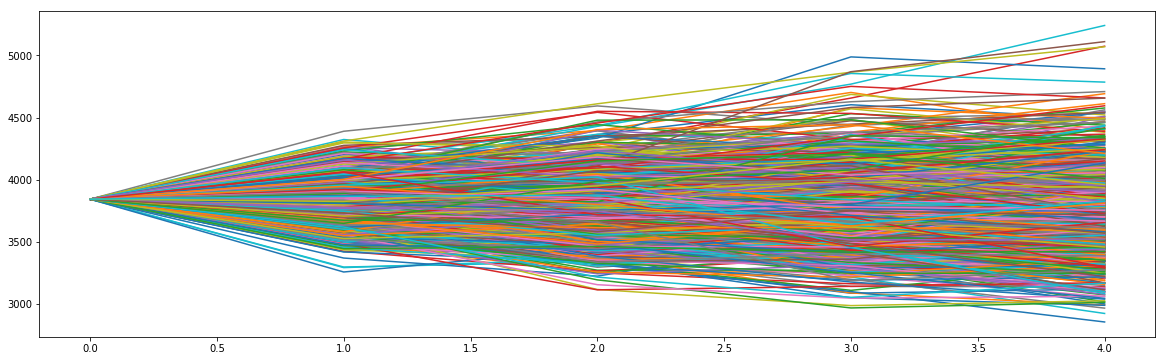

In [25]:
plt.figure(figsize=(20,6))
plt.plot(price_list);

In [26]:
avg = price_list.mean()
avg

3808.4175553430946

In [27]:
std = price_list.std()
std

245.83120513807233

In [28]:
print("The average price for the next {} days is {}.".format(t_intervals,round(avg)))
print(" ")
std1 = avg + std
print("Upper First Standard Deviation for {} days ahead is {}.".format(t_intervals,round(std1)))
std1l = avg - std
print("Lower First Standard Deviation for {} days ahead is {}.".format(t_intervals,round(std1l)))
print(" ")
std2 = avg + std * 2
print("Upper Second Standard Deviation for {} days ahead is {}.".format(t_intervals,round(std2)))
std2l = avg - std * 2
print("Lower Second Standard Deviation for {} days ahead is {}.".format(t_intervals,round(std2l)))
print(" ")
std3 = avg + std * 3
print("Upper Third Standard Deviation for {} days ahead is {}.".format(t_intervals,round(std3)))
std3l = avg - std * 3
print("Lower Third Standard Deviation for {} days ahead is {}.".format(t_intervals,round(std3l)))

The average price for the next 5 days is 3808.0.
 
Upper First Standard Deviation for 5 days ahead is 4054.0.
Lower First Standard Deviation for 5 days ahead is 3563.0.
 
Upper Second Standard Deviation for 5 days ahead is 4300.0.
Lower Second Standard Deviation for 5 days ahead is 3317.0.
 
Upper Third Standard Deviation for 5 days ahead is 4546.0.
Lower Third Standard Deviation for 5 days ahead is 3071.0.


In [29]:
type(price_list)

numpy.ndarray

In [30]:
len(list(price_list))

5

In [31]:
price_list.tolist

<function ndarray.tolist>

In [32]:
p = pd.DataFrame(price_list)

In [33]:
writer = pd.ExcelWriter('Monte_Carlo.xlsx',engine='xlsxwriter')

In [34]:
p.to_excel(writer,sheet_name='Monte_Carlo')

In [35]:
writer.save()

In [36]:
writer

In [37]:
export_excel = p.to_excel (r'C:\Users\rpark\Desktop\Monte_Carlo_2018.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path